<a href="https://colab.research.google.com/github/arpitsharma27/CreditCard_Segmentation/blob/main/CreditCard_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# prompt: read BankChurners.csv in to python dataframe

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
df = pd.read_csv('/content/BankChurners.csv')
# print(df.head())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [17]:
# df.value_counts('Attrition_Flag')
df.value_counts('Attrition_Flag', normalize=True)

,proportion
Attrition_Flag,
Existing Customer,0.83934
Attrited Customer,0.16066


In [20]:
df.value_counts('Gender', normalize=True)

,proportion
Gender,
F,0.529081
M,0.470919


In [21]:
def GetFrequencyCounts(columname):
  print(df.value_counts(columname, normalize=True))

In [23]:
GetFrequencyCounts('Attrition_Flag')

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64


In [24]:
GetFrequencyCounts('Gender')

Gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64


In [25]:
df.groupby('Gender')['Attrition_Flag'].value_counts()

Gender  Attrition_Flag   
F       Existing Customer    4428
        Attrited Customer     930
M       Existing Customer    4072
        Attrited Customer     697
Name: count, dtype: int64

In [32]:
pd.crosstab(index=[df['Gender'],df['Marital_Status'],df['Education_Level']], columns=df['Attrition_Flag'])

Attrition_Flag                         Attrited Customer  Existing Customer
Gender Marital_Status Education_Level                                      
F      Divorced       College                          4                 45
                      Doctorate                        5                 15
                      Graduate                        19                100
                      High School                     11                 53
                      Post-Graduate                    4                 19
                      Uneducated                      16                 62
                      Unknown                          9                 40
       Married        College                         38                201
                      Doctorate                       32                 94
                      Graduate                       131                647
                      High School                     78                402
                      Post-Graduate                   20                106
                      Uneducated                      44                298
                      Unknown                         69                291
       Single         College                         30                177
                      Doctorate                       23                 74
                      Graduate                       119                528
                      High School                     66                345
                      Post-Graduate                   17                 78
                      Uneducated                      59                262
                      Unknown                         67                280
       Unknown        College                          7                 30
                      Doctorate                        4                 10
                      Graduate                        24                102
                      High School                     17                 56
                      Post-Graduate                    3                 16
                      Uneducated                       8                 47
                      Unknown                          6                 50
M      Divorced       College                          7                 30
                      Doctorate                        3                 13
                      Graduate                        17                 89
                      High School                     11                 53
                      Post-Graduate                    4                 14
                      Uneducated                       4                 54
                      Unknown                          7                 40
       Married        College                         33                195
                      Doctorate                       14                 65
                      Graduate                        82                619
                      High School                     59                410
                      Post-Graduate                   17                100
                      Uneducated                      49                265
                      Unknown                         43                285
       Single         College                         33                146
                      Doctorate                       12                 73
                      Graduate                        83                467
                      High School                     52                319
                      Post-Graduate                   18                 76
                      Uneducated                      43                222
                      Unknown                         46                228
       Unknown        College                          2                 35
                      Doctorate                 

In [45]:
# Count grouped values
grouped = df.groupby(['Gender', 'Marital_Status', 'Education_Level', 'Attrition_Flag']).size().reset_index(name='Count')

# Plot sunburst
fig = px.sunburst(grouped,
                  path=['Gender', 'Marital_Status', 'Education_Level', 'Attrition_Flag'],
                  values='Count',
                  title='Customer Attrition Breakdown')
fig.show()


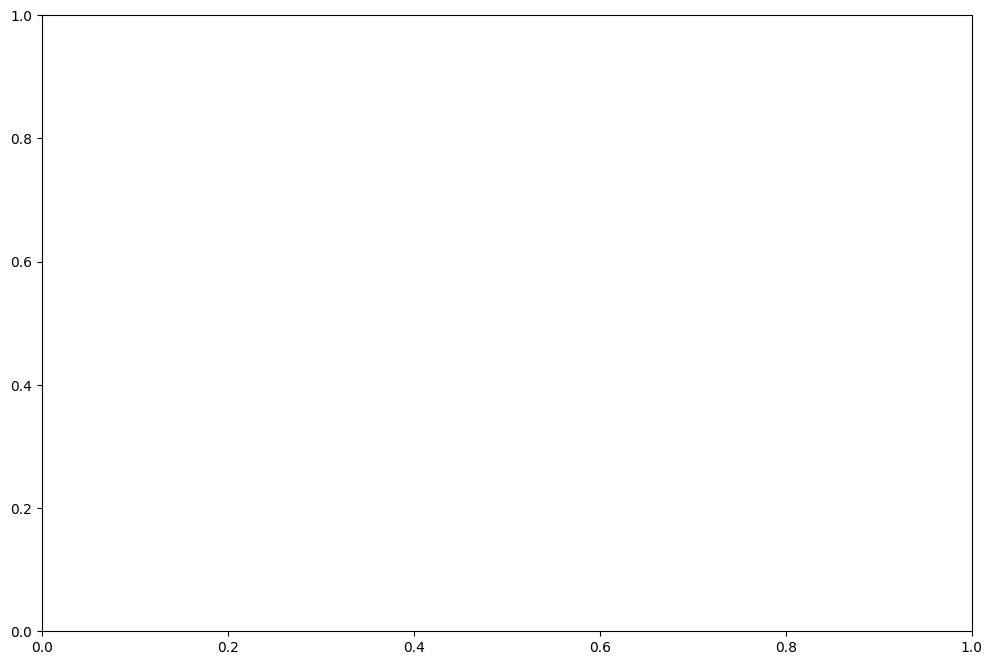

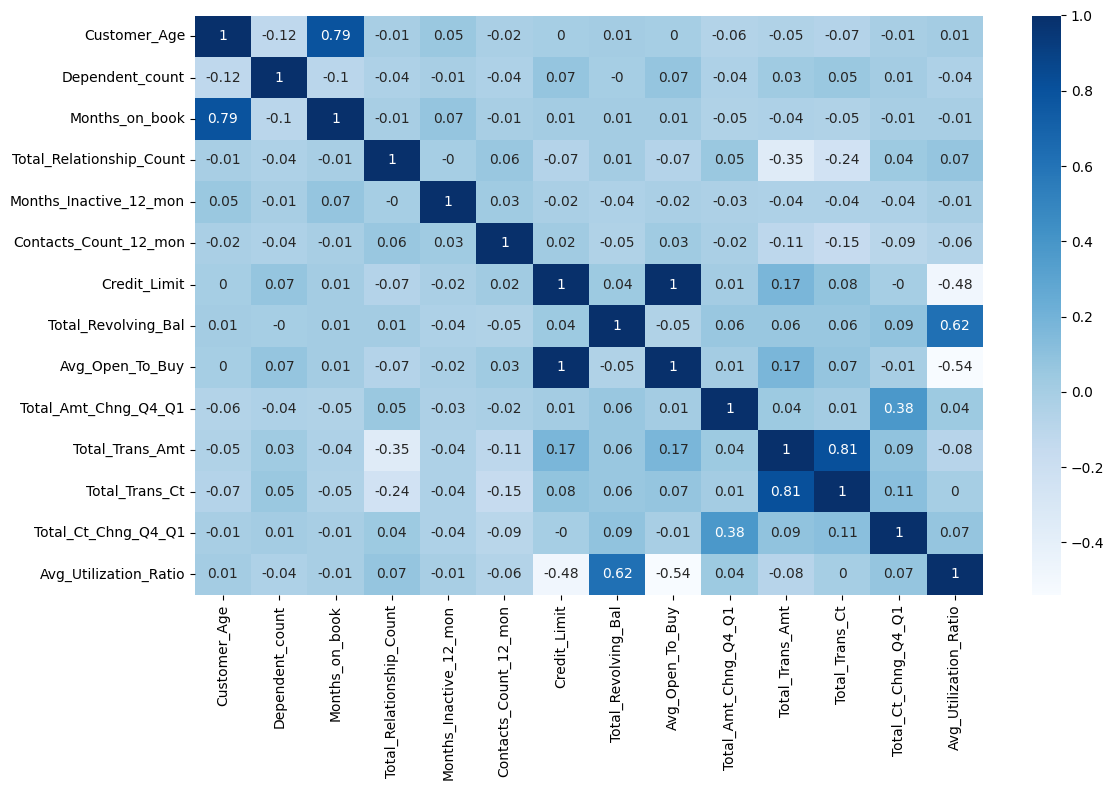

In [46]:
fig,ax= plt.subplots(figsize=(12,8))

corr_matrix = df.drop(['CLIENTNUM', 'Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], axis=1).corr().round(2)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,8))

# Plot Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=ax)

plt.tight_layout()
plt.show()

In [44]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000
